In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
%matplotlib inline

In [5]:
path=r'C:\Python\DM exercise\dm\chapter5\demo\data'
filename='consumption_data.xls'
file=os.path.join(path,filename)
data=pd.read_excel(file,index_col='Id')

In [6]:
k=3
iteration=500
dt=1.0*(data-data.mean())/data.std()

In [7]:
model=KMeans(n_clusters=k,n_jobs=2,max_iter=iteration)
model.fit(dt)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=2, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
r=pd.concat([data,pd.Series(model.labels_,index=data.index)],axis=1)
r.columns=list(data.columns)+['t']
r

,R,F,M,t
Id,,,,
1,27,6,232.61,1
2,3,5,1507.11,1
3,4,16,817.62,0
4,3,11,232.81,1
5,14,7,1913.05,1
6,19,6,220.07,1
7,5,2,615.83,1
8,26,2,1059.66,1
9,21,9,304.82,1


In [46]:
r['t'].value_counts()

1    560
0    340
2     40
Name: t, dtype: int64

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

TypeError: Empty 'DataFrame': no numeric data to plot

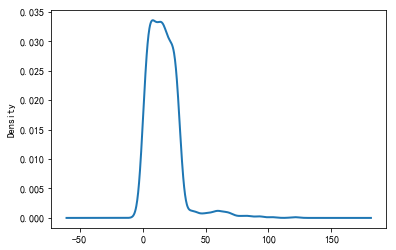

In [38]:
plt.figure()
for i in range(3):
    d=r[r['t']==i]
    dd=d.iloc[:,i]
    dd.plot(kind='kde',label=r.columns[i],subplots=True,linewidth=2)
# plt.ylabel(u'密度')
# plt.xlabel(u'人数')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012D75828>], dtype=object)

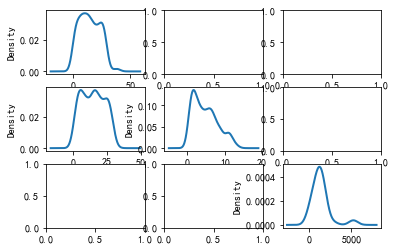

In [77]:
# plt.figure()
fig,axes=plt.subplots(3,3)
r[r['t']==0].iloc[:,0].plot(kind='kde',label=r.columns[0],subplots=True,ax=axes[0,0],linewidth=2)
r[r['t']==1].iloc[:,0].plot(kind='kde',label=r.columns[1],subplots=True,ax=axes[1,0],linewidth=2)
# r[r['t']==2].iloc[:,0].plot(kind='kde',label=r.columns[2],subplots=True,ax=axes[2,0],linewidth=2)
# r[r['t']==0].iloc[:,1].plot(kind='kde',label=r.columns[0],subplots=True,ax=axes[0,1],linewidth=2)
r[r['t']==1].iloc[:,1].plot(kind='kde',label=r.columns[1],subplots=True,ax=axes[1,1],linewidth=2)
# r[r['t']==2].iloc[:,1].plot(kind='kde',label=r.columns[2],subplots=True,ax=axes[2,1],linewidth=2)
# r[r['t']==0].iloc[:,2].plot(kind='kde',label=r.columns[0],subplots=True,ax=axes[0,2],linewidth=2)
# r[r['t']==1].iloc[:,2].plot(kind='kde',label=r.columns[1],subplots=True,ax=axes[1,2],linewidth=2)
r[r['t']==2].iloc[:,2].plot(kind='kde',label=r.columns[2],subplots=True,ax=axes[2,2],linewidth=2)

In [81]:
df=r.set_index([r.index,r['t']])
df

,,R,F,M,t
Id,t,,,,
1,1,27,6,232.61,1
2,1,3,5,1507.11,1
3,0,4,16,817.62,0
4,1,3,11,232.81,1
5,1,14,7,1913.05,1
6,1,19,6,220.07,1
7,1,5,2,615.83,1
8,1,26,2,1059.66,1
9,1,21,9,304.82,1


In [83]:
df_r=df['R'].unstack()

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

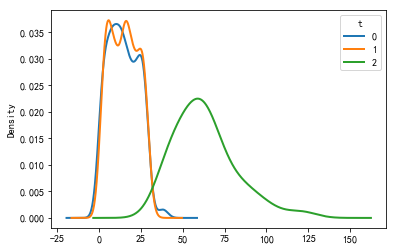

In [89]:
file=r'C:\Users\YECHAO\Desktop\tu_'
fig=plt.figure()
df_r.plot(kind='kde',label=df_r.columns,linewidth=2).savefig(u'%s%s.png' %(file, 1))

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

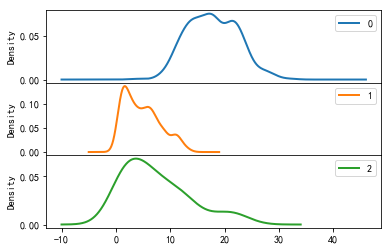

In [96]:
df_f=df['F'].unstack()
df_f.plot(kind='kde',label=df_f.columns,linewidth=2,subplots=True,sharex=True)
plt.subplots_adjust( wspace = 0, hspace = 0 )
plt.set_xlabel(u'密度')

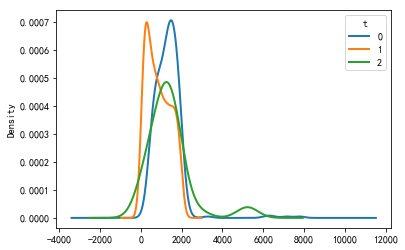

In [87]:
df_m=df['M'].unstack()
df_m.plot(kind='kde',label=df_m.columns,linewidth=2)